# Определение тональности комментариев

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-и-задачи-исследования" data-toc-modified-id="Цель-и-задачи-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель и задачи исследования</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-общий-обзор-данных" data-toc-modified-id="Загрузка-и-общий-обзор-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка и общий обзор данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Модели-на-основе-TF-IDF" data-toc-modified-id="Модели-на-основе-TF-IDF-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модели на основе TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Разделение-на-выборки-и-формирование-пайплайна" data-toc-modified-id="Разделение-на-выборки-и-формирование-пайплайна-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Разделение на выборки и формирование пайплайна</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Модель-на-основе-BERT" data-toc-modified-id="Модель-на-основе-BERT-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Модель на основе BERT</a></span><ul class="toc-item"><li><span><a href="#Токенизация" data-toc-modified-id="Токенизация-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Токенизация</a></span></li><li><span><a href="#Создание-эмбеддингов" data-toc-modified-id="Создание-эмбеддингов-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Создание эмбеддингов</a></span></li><li><span><a href="#Разделение-на-выборки-и-обучение-модели" data-toc-modified-id="Разделение-на-выборки-и-обучение-модели-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Разделение на выборки и обучение модели</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Цель и задачи исследования

**Заказчик исследования:** интернет-магазин.

**Цель:** построить модель для классификации комментариев к товарам на позитивные и негативные.

**Критерий качества модели**: метрика *F1* не меньше 0.75.

**Задачи (этапы) исследования:**
1. Провести загрузку и общий обзор:
- загрузить данные;
- провести общий обзор.
2. Повести подготовку данных для моделей TF-IDF:
- провести лемматизацию;
- провести векторизацию, используя TF-IDF.
3. Построить модели классификации комментариев:
- построить не менее 2 моделей;
- выбрать лучшую модель;
- рассчитать для лучшей модели метрику *F1* на тестовой выборке.
4. Построить модель на основе BERT:
- провести токенизацию;
- сформировать эмбеддинги;
- построить модель классификации;
- рассчитать метрику *F1* на тестовой выборке.
5. Сформулировать общие выводы.

## Описание данных

Датасет `toxic_comments.csv`:
- столбец *text* — текст комментария;
- столбец *toxic* — целевой признак.

## Импорт библиотек

Обновим sklearn и lightgbm.

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install -U lightgbm

Установим (обновим) wordcloud.

In [ ]:
!pip install -U Pillow
!pip install -U wordcloud

Импортируем необходимые библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
import transformers
from tqdm import notebook

from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import f1_score

from wordcloud import WordCloud
from lightgbm import LGBMClassifier
import joblib

Загрузим данные для NTLK.

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Установим значение для генератора случайных чисел

In [ ]:
RANDOM_STATE = 42

## Загрузка и общий обзор данных

### Загрузка данных

In [ ]:
try:
    comments = pd.read_csv('...', index_col=[0])
except:
    comments = pd.read_csv('...', index_col=[0])

### Обзор данных

In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
comments.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


В датасете представлены 159292 комментария.

Рассмотрим баланс положительных и отрицательных классов

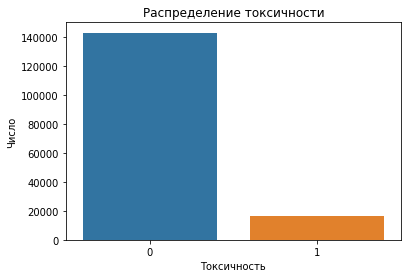

In [ ]:
sns.countplot(data=comments, x='toxic')\
.set(title='Распределение токсичности',
     xlabel='Токсичность',
     ylabel='Число');

Классы несбалансированы, что нужно будет учесть при моделировании.

### Промежуточные выводы

Мы загрузили данные и установили, что:
- в датасете представлены почти 160 тыс. комментариев;
- классы в целевом признаке имеют достаточно сильный дисбаланс.

## Модели на основе TF-IDF

### Лемматизация

Проведем очистку текста и его лемматизацию.

In [ ]:
corpus = list(comments['text'])

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif nltk_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return None

def clear_lemmatize(text):
    cleared_text = re.sub(r'[^A-Za-z \n]', '', text).lower()
    cleared_text = [i for i in cleared_text.split() if i not in stop_words]
    pos_tagged = nltk.pos_tag(cleared_text)
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_text=[]
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_text.append(word)
        else:
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))

    lemmatized_text = ' '.join(lemmatized_text)

    return lemmatized_text

In [ ]:
try:
    comments['lemm_text'] = pd.read_csv('lemm_text.csv', index_col=[0])['lemm_text']
    comments['lemm_text'] = comments['lemm_text'].apply(np.str_)
except:
    comments['lemm_text'] = [clear_lemmatize(corpus[i]) for i in notebook.tqdm(range(len(corpus)))]
    comments['lemm_text'].to_csv('lemm_text.csv')

In [ ]:
comments.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,daww match background colour im seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really try edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,cant make real suggestion improvement wonder s...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page thats


Выведем наиболее часто встречающиеся слова в токсичных и нетоксичных комментариях.

In [ ]:
text_toxic = ' '.join(comments[comments['toxic']==1]['lemm_text'])
text_nontoxic = ' '.join(comments[comments['toxic']==0]['lemm_text'])

In [ ]:
wordcloud_toxic = WordCloud(collocations=False).generate(text_toxic)
wordcloud_nontoxic = WordCloud(collocations=False).generate(text_nontoxic)

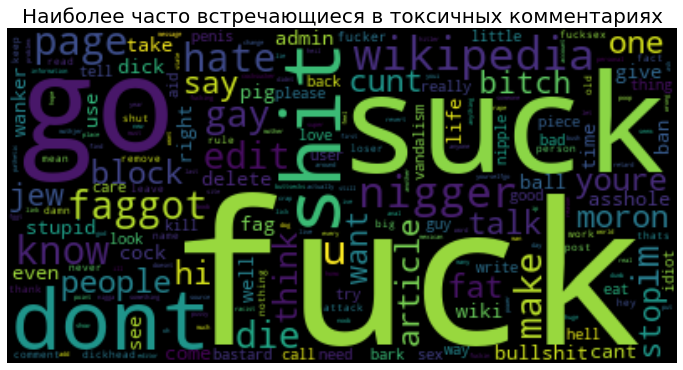

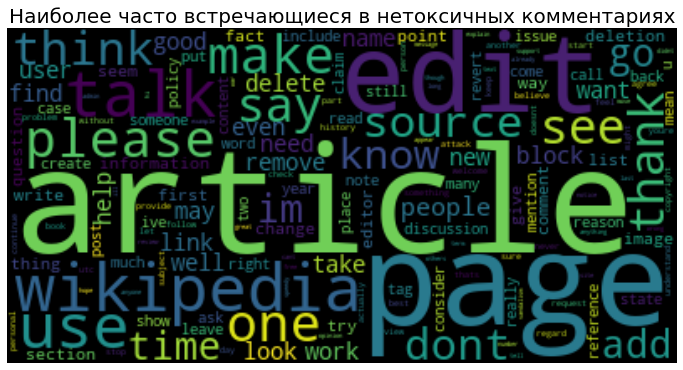

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Наиболее часто встречающиеся в токсичных комментариях', fontsize=20)
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_nontoxic, interpolation='bilinear')
plt.axis('off')
plt.title('Наиболее часто встречающиеся в нетоксичных комментариях', fontsize=20)
plt.show()

"Облака слов" говорят сами за себя ). Вместе с тем отдельные слова (например, *page*, *don't*) достаточно часто встречаются как в токсичных, так и в нетоксичных комментария.

### Разделение на выборки и формирование пайплайна

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    comments['lemm_text'],
    comments['toxic'],
    test_size=0.33,
    stratify=comments['toxic'],
    random_state=RANDOM_STATE
)

In [ ]:
pipe = Pipeline(
    [
        ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
        ('models', LogisticRegression())
    ]
)

### Обучение моделей

Т.к. в исходных данных наблюдается дисбаланс в целевом признаке, при обучении используем специальный параметр для балансирования весов классов.

In [ ]:
param_grid = [
    # словарь для модели LogisticRegression
    {
        'models': [
            LogisticRegression(
                class_weight='balanced',
                max_iter=200,
                solver='saga',
                random_state=RANDOM_STATE
            )
        ],
        'models__C': range(10, 16),
        'models__penalty': [None, 'l2']
    },

    # словарь для модели LGBMClassifier
    {
        'models': [
            LGBMClassifier(
                class_weight='balanced',
                random_state=RANDOM_STATE,
                verbosity=-1
            )
        ],
       'models__max_depth': [-1, 10]
    }
]

In [ ]:
try:
    grid_search = joblib.load('gs_object.joblib')
except:
    grid_search = GridSearchCV(
        pipe,
        param_grid,
        cv=2,
        scoring='f1',
        verbose=3
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'gs_object.joblib')

Выведем таблицу с лучшими результатами для каждого типа моделей.

In [ ]:
df = pd.DataFrame(grid_search.cv_results_)[['param_models', 'params', 'mean_test_score']]
df.columns = ['model', 'best_parameters', 'F1_cv']
df.sort_values('F1_cv', ascending=False) \
.groupby('model', sort=False) \
.agg({'best_parameters': 'first', 'F1_cv': 'first'})

,best_parameters,F1_cv
model,,
"LogisticRegression(class_weight='balanced', max_iter=200, random_state=42,\n solver='saga')",{'models': LogisticRegression(class_weight='ba...,0.754813
"LGBMClassifier(class_weight='balanced', random_state=42, verbosity=-1)",{'models': LGBMClassifier(class_weight='balanc...,0.723185


Лучшей моделью стала логистическая регрессия с l2-регуляризацией.

Рассчитаем значение метрики F1 на тестовой выборке.

In [ ]:
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1 на тестовой выборке: {f1:.4f}')

F1 на тестовой выборке: 0.7656


Значение метрики превосходит минимальный пороговый уровень, определенный заказчиком.

Сравним результат с dummy-моделью.

In [ ]:
dummy_clf = DummyClassifier(
    strategy='stratified',
    random_state=RANDOM_STATE
)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1 для dummy-модели на тестовой выборке: {f1:.4f}')

F1 для dummy-модели на тестовой выборке: 0.1048


Показатель dummy-модели значительно ниже, т.е. лучшая модель действительно полезна при классификации.

### Промежуточные выводы

Мы построили модели на основе TF-IDF, в т.ч.:
- провели лемматизацию;
- разделили датасет на выборки и сформировали пайплайн, включающий в т.ч. векторизацию TF-IDF;
- перебрали гиперпараметры для моделей на основе логистической регрессии и LGBM;
- лучшей моделью на кросс-валидации стала логистическая регрессия с l2-регуляризацией, которая показала *F1* = 0.7656 на тестовой выборке.

## Модель на основе BERT

Воспользуемся предобученной моделью.

In [ ]:
model_name = 'unitary/toxic-bert'

### Токенизация

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained(model_name)

In [ ]:
notebook.tqdm.pandas()

Здесь и далее - в целях сокращения времени запуска блокнота будем использовать данные и модели, сохраненные при обучении на машине с GPU.

In [ ]:
try:
    padded = np.load('padded.npy')
except:
    tokenized = comments['text'].progress_apply(
        lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

    max_len = 512 # для предобученной модели это максимальная длина токена
    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
    np.save('padded.npy', padded)

Создадим "маску внимания".

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)

### Создание эмбеддингов

In [ ]:
try:
    features = np.load('features.npy')
except:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = transformers.BertModel.from_pretrained(model_name).to(device)
    batch_size = 100
    embeddings = []
    for i in notebook.tqdm(range(padded.shape[0] // batch_size + 1)):
        min = batch_size*i
        max = batch_size*(i+1)
        if max > padded.shape[0]:
            max = padded.shape[0]
        batch = torch.LongTensor(padded[min:max]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask[min:max]).to(device)

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].to('cpu').numpy())

    features = np.concatenate(embeddings)
    np.save('features.npy', features)

### Разделение на выборки и обучение модели

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    comments['toxic'],
    test_size=0.33,
    stratify=comments['toxic'],
    random_state=RANDOM_STATE
)

In [ ]:
try:
    model_lr_bert = joblib.load('model_lr_bert.joblib')
except:
    model_lr_bert = LogisticRegression(
        solver='saga',
        random_state=RANDOM_STATE
    )
    model_lr_bert.fit(X_train, y_train)
    joblib.dump(model_lr_bert, 'model_lr_bert.joblib')

Проверим результаты модели на тестовой выборке.

In [ ]:
y_pred = model_lr_bert.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1 на тестовой выборке: {f1:.4f}')

F1 на тестовой выборке: 0.9462


Мы получили очень высокое значение метрики.

### Промежуточные выводы

Мы построили модели на основе BERT, в т.ч.:
- использовали предобученную модель;
- осуществили токенизацию и создание эмбеддингов;
- модель показала *F1* = 0.9462 на тестовой выборке.

## Общий вывод

Мы построили разные модели классификации комментариев к товарам на позитивные и негативные и выбрали из них лучшую.

В том числе мы:
1. Провели загрузку и общий обзор данных, установили наличие дисбаланса по целевому признаку.
2. Построили модели на основе TF-IDF:
- провели лемматизацию и векторизацию;
- перебрали гиперпараметры для нескольких моделей (логичтическая регрессия и Light GBM);
- установили, что лучшей моделью является логистическая регрессия с l2-регуляризацией, которая показала *F1* = 0.7656 на тестовой выборке, что выше целевого значения.
3. Построили модель на основе BERT:
- провели токенизацию и сформировали эмбеддинги;
- используя логистическую регрессию, построили модель классификации, которая показала *F1* = 0.9462 на тестовой выборке, что значительно выше целевого значения.

Таким образом, лучшей моделью стала модель на основе BERT. Однако у нее есть недостаток: долгое обучение.

**Рекомендация заказчику:**
- взять на вооружение полученные модели;
- в зависимости от конкретной задачи можно использовать разные модели: для быстрой (но не всегда точной) оценки тональности - модель на основе TF-IDF, для значительно более точной - модель на основе BERT.